# Informasi terkait Dataset
Data ini adalah data mengenai pelanggan-pelanggan yang melakukan churn pada perusahaan telekomunikasi atau telco (churn adalah kehilangan pelanggan atau pelanggan yang “pergi” atau tidak berlangganan lagi). Perusahaan ingin mengurangi jumlah pelanggan yang churn dengan memberikan penawaran menarik, bagi pelanggan yang berpotensi besar akan melakukan churn.

Dataset ini terdiri dari 21 kolom, penjelasan setiap kolomnya secara berurutan sebagai berikut:
1. customerID: ID konsumen
2. Gender: jenis kelamin konsumen (laki-laki atau perempuan)
3. SeniorCitizen: konsumen merupakan warga lanjut usia atau bukan (1, 0)
4. Partner: konsumen memiliki pasangan atau tidak (Ya, Tidak)
5. Dependents: konsumen memiliki tanggungan atau tidak (Ya, Tidak)
6. Tenure: berapa bulan konsumen telah berlangganan di perusahaan
7. PhoneService: konsumen memiliki layanan telepon atau tidak (Ya, Tidak)
8. MultipleLines: konsumen memiliki banyak saluran atau tidak (Ya, Tidak, Tidak ada layanan telepon)
9. InternetService: layanan internet konsumen (DSL, Fiber optic, Bukan keduanya)
10. OnlineSecurity: konsumen memiliki keamanan online atau tidak (Ya, Tidak, Tidak ada layanan internet)
11. OnlineBackup: konsumen memiliki backup online atau tidak (Ya, Tidak, Tidak ada layanan internet)
12. DeviceProtection: konsumen memiliki perlindungan perangkat atau tidak (Ya, Tidak, Tidak ada layanan internet)
13. TechSupport: konsumen memiliki dukungan teknis atau tidak (Ya, Tidak, Tidak ada layanan internet)
14. StreamingTV: konsumen memiliki TV streaming atau tidak (Ya, Tidak, Tidak ada layanan internet)
15. StreamingMovies: konsumen memiliki streaming film atau tidak (Ya, Tidak, Tidak ada layanan internet)
16. Contract: jangka waktu kontrak konsumen (Bulan-ke-bulan, Satu tahun, Dua tahun)
17. PaperlessBilling: konsumen memiliki tagihan tanpa kertas (paperless) atau tidak (Ya,Tidak)
18. PaymentMethod: metode pembayaran konsumen (Cek elektronik, Cek pos, Transfer bank (otomatis), Kartu kredit (otomatis)
19. MonthlyCharges: jumlah yang ditagihkan kepada konsumen setiap bulan
20. TotalCharges: total yang ditagihkan kepada konsumen
21. Churn: konsumen keluar atau tidak (Ya, Tidak)


## Import Library
Dalam project ini digunakan beberapa library yakni `pandas`, `matplotlib`, `numpy`, dan `seaborn`
Kemudian pada project ini diminta untuk melakukan permodelan, maka digunakan library berupa `sklearn`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('telco-churn55.csv')

## Mempersiapkan Dataset (Cleaning)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Wanita,1.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Wanita,NaN,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     6957 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cek Data Kosong

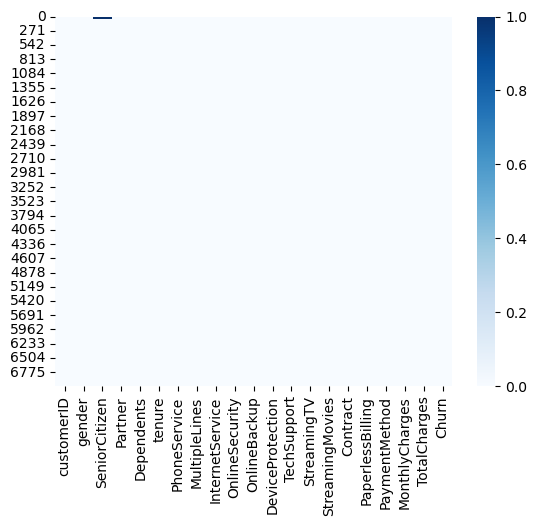

In [9]:
sns.heatmap(df.isnull(), cmap='Blues');

Terdapat data kosong pada kolom `SeniorCitizen` kita gunakan mode untuk mengisinya

In [10]:
df.SeniorCitizen.value_counts()

0.0    5858
1.0    1099
Name: SeniorCitizen, dtype: int64

In [11]:
from scipy.stats import mode

senior_mode = mode(df['SeniorCitizen'], axis=None).mode[0]

df['SeniorCitizen'].fillna(senior_mode, inplace=True)

C:\Users\asani\AppData\Local\Temp\ipykernel_4980\3342142887.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  senior_mode = mode(df['SeniorCitizen'], axis=None).mode[0]


In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

data yang kosong sudah terisi, namun perlu kita cek apakah ada data duplikat

In [13]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


data duplikat tidak ditemukan kemudian jika kita lihat pada tipe data untuk kolom `SeniorCitizen` berupa float harusnya berupa integer

In [14]:
def convert_to(x, output_type=int):
  if x == ' ':
    return 0.0
  else:
    return output_type(x)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert_to)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Selanjutnya setelah dilakukan pengecekan terdapat penulisan tidak konsisten pada kolom `gender` yang harus kita ubah

In [16]:
df['gender'].unique()

array(['Wanita', 'Male', 'Pria', 'Female'], dtype=object)

In [17]:
df['gender'].mask(df['gender'] == 'Wanita', 'Female', inplace=True)
df['gender'].mask(df['gender'] == 'Pria', 'Male', inplace=True)

In [18]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

Selanjutnya untuk mempermudah analisa kita perlu mengklasifikasikan fitur-fitur kedalam categorical features dan numerical features agar selanjutnya lebih mudah

In [19]:
categorical_features = []
numerical_features = []

for col in df.columns:
  if len(df[col].unique())<=10:
    categorical_features.append(col)
  else:
    numerical_features.append(col)

print('numerical_features = ', numerical_features)
print('categorical_features = ', categorical_features)

numerical_features =  ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features =  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Analisa dan Visualisasi Data
Semua Data Sudah terisi dan tidak ada nilai yang sama, sekarang kita dapat melanjutkan ke tahap analisa dan visualisasi
untuk melakukan analisa kita perlu menentukan tujuan analisanya terlebih dahulu, yaitu untuk memprediksi customer yang churn

In [20]:
df = df.drop(df[df['tenure'] == 120].index) #menghapus data yang menyebabkan grafik error

### Persentase Customer Churn

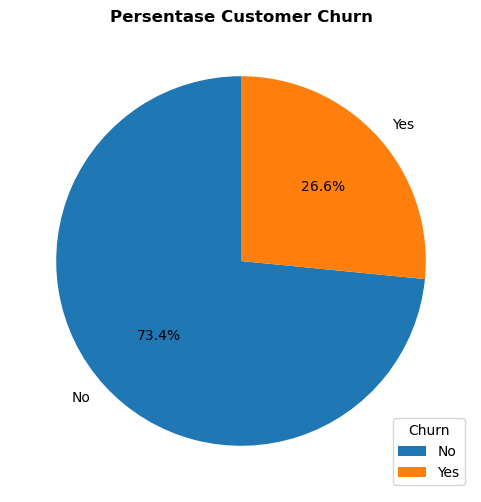

In [21]:
customer_churn = df['Churn'].value_counts()

# Mengatur label dan nilai untuk pie chart
labels = customer_churn.index
sizes = customer_churn.values

# Mengatur tampilan grafik
plt.figure(figsize=(6, 6))

# Membuat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.legend(title='Churn', loc='lower right')

# Mengatur judul
plt.title('Persentase Customer Churn', fontsize=12, fontweight='bold')

# Menampilkan pie chart
plt.show()

Berdasarkan dataset yang ada sudah 26.5% customer yang churning

C:\Users\asani\AppData\Local\Temp\ipykernel_4980\638309665.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tenure'])
C:\Users\asani\AppData\Local\Temp\ipykernel_4980\638309665.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'])
C:\Users\asani\AppData\Local\Temp\ipyk

<Axes: xlabel='TotalCharges', ylabel='Density'>

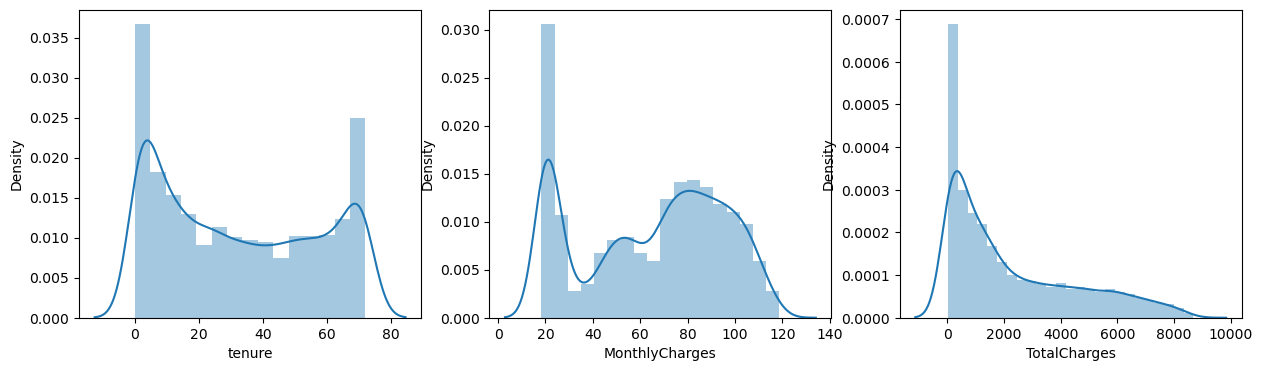

In [22]:
#cek distribusi numerikal features
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.distplot(df['tenure'])
plt.subplot(132)
sns.distplot(df['MonthlyCharges'])
plt.subplot(133)
sns.distplot(df['TotalCharges'])

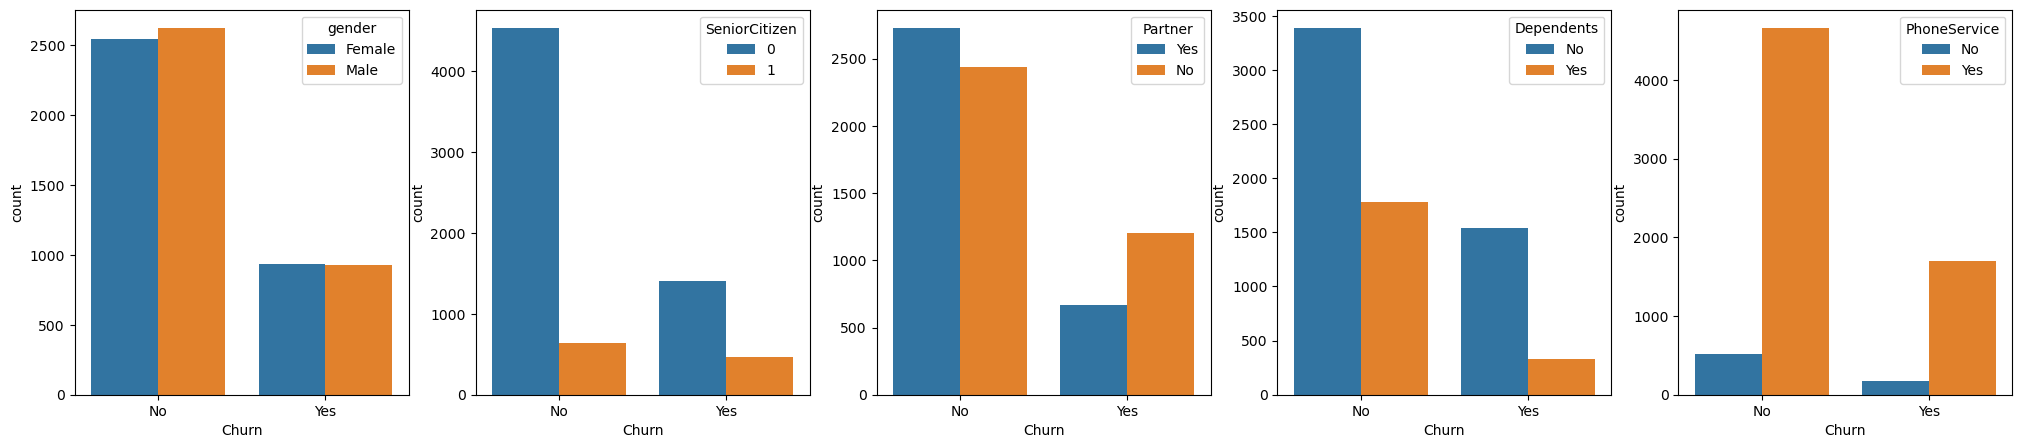

In [23]:
# cek distribusi categorical feature
plt.figure(figsize=(25,5))
plt.subplot(151)
sns.countplot(df, x='Churn', hue='gender');
plt.subplot(152)
sns.countplot(df, x='Churn', hue='SeniorCitizen');
plt.subplot(153)
sns.countplot(df, x='Churn', hue='Partner');
plt.subplot(154)
sns.countplot(df, x='Churn', hue='Dependents');
plt.subplot(155)
sns.countplot(df, x='Churn', hue='PhoneService');

Berdasarkan grafik dapat kita simpulkan bahwa :
1. Gender tidak terlalu berpengaruh terhadap churning
2. Senior Citizen lebih cenderung untuk tidak churning
3. customer yang tidak berpasangan cenderung untuk churning
4. customer yang tidak memiliki tanggungan justru berpontensi churning
5. customer yang yang memasang phoeservice cenderung tidak berpotensi churning

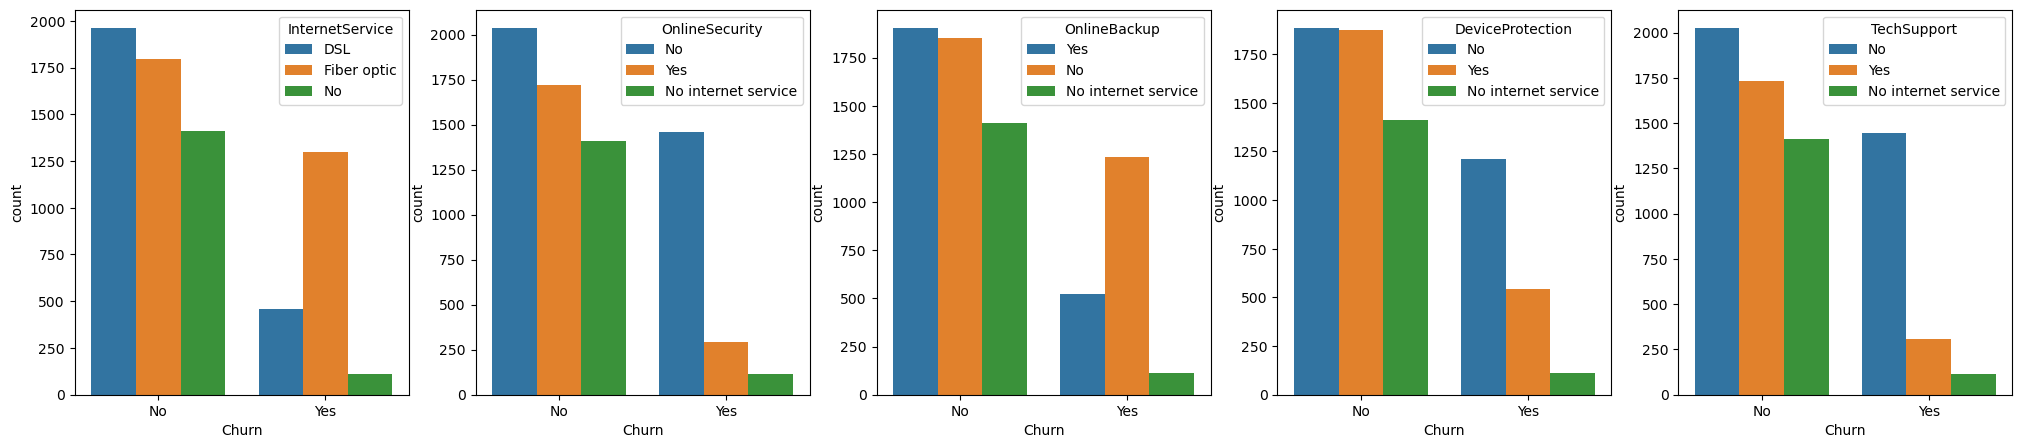

In [24]:
# cek distribusi categorical feature
plt.figure(figsize=(25,5))
plt.subplot(151)
sns.countplot(df, x='Churn', hue='InternetService');
plt.subplot(152)
sns.countplot(df, x='Churn', hue='OnlineSecurity');
plt.subplot(153)
sns.countplot(df, x='Churn', hue='OnlineBackup');
plt.subplot(154)
sns.countplot(df, x='Churn', hue='DeviceProtection');
plt.subplot(155)
sns.countplot(df, x='Churn', hue='TechSupport');

Berdasarkan grafik dapat kita simpulkan bahwa :
1. Customer dengan Internet Service berupa Fiber Optic Cenderung Churning
2. Customer yang tidak memiliki Online Security cenderung churning
3. Customer yang tidak memiliki Online Backup cenderung churning
4. Customer yang tidak memiliki Device Protection cenderung churning
5. Customer yang tidak memiliki Tech Suppoert cenderung churning

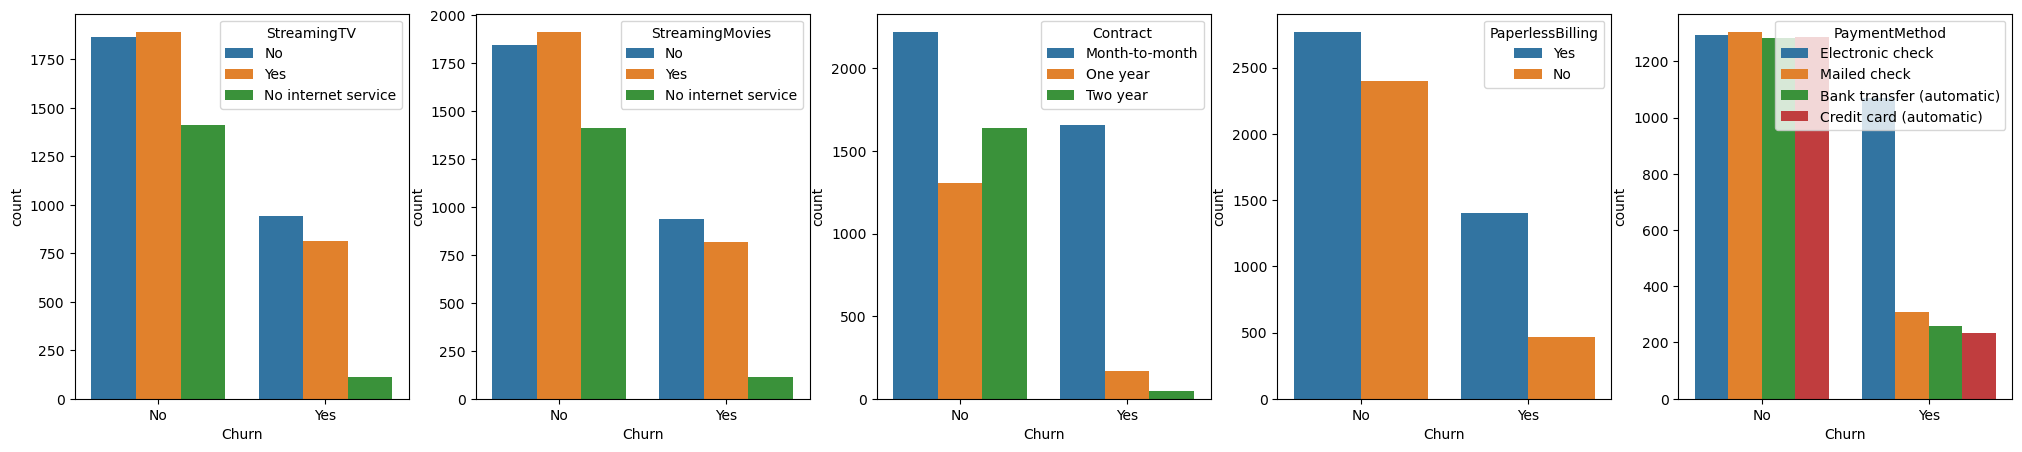

In [25]:
# cek distribusi categorical feature
plt.figure(figsize=(25,5))
plt.subplot(151)
sns.countplot(df, x='Churn', hue='StreamingTV');
plt.subplot(152)
sns.countplot(df, x='Churn', hue='StreamingMovies');
plt.subplot(153)
sns.countplot(df, x='Churn', hue='Contract');
plt.subplot(154)
sns.countplot(df, x='Churn', hue='PaperlessBilling');
plt.subplot(155)
sns.countplot(df, x='Churn', hue='PaymentMethod');

Berdasarkan grafik tidak ada hal yang terlalu signifikan kecuali di bagian `contract` menunjukkan bahwa customer yang memilih berlangganan perbulan lebih cenderung untuk churning

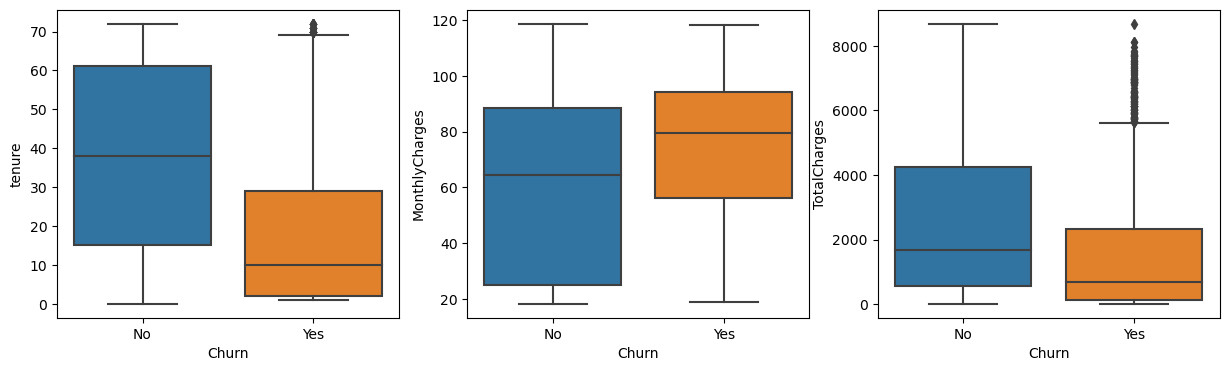

In [26]:
# menginvestigasi churning berdasarkan numerikal feature
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.boxplot(df, x='Churn', y='tenure');
plt.subplot(132)
sns.boxplot(df, x='Churn', y='MonthlyCharges');
plt.subplot(133)
sns.boxplot(df, x='Churn', y='TotalCharges');

Berdasarkan grafik dapat kita simpulkan bahwa :
1. tenure/lamanya customer berlangganan justru membuat customer cenderung tidak churning
2. pembayaran bulanan memiliki peran yang signifikan dalam keputusan customer untuk churning

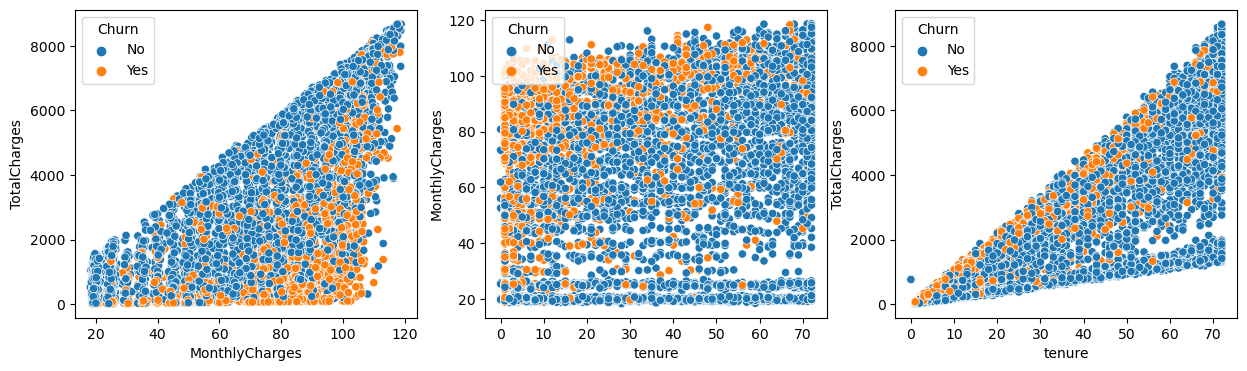

In [27]:
# menginvestigasi churning berdasarkan numerikal feature

plt.figure(figsize=(15, 4))

plt.subplot(131)
sns.scatterplot(x=df['MonthlyCharges'], y=df['TotalCharges'], hue=df['Churn'])

plt.subplot(132)
sns.scatterplot(x=df['tenure'], y=df['MonthlyCharges'], hue=df['Churn'])

plt.subplot(133)
sns.scatterplot(x=df['tenure'], y=df['TotalCharges'], hue=df['Churn'])

plt.show()

Berdasarkan grafik di atas dapat kita ambil kesimpulan bahwa :
1. customer dengan pembayaran bulanan yang tinggi cenderung untuk churning
2. customer yang baru berlangganan serta pembayaran bulanan tinggi cenderung churning

### Persentase Payment Method

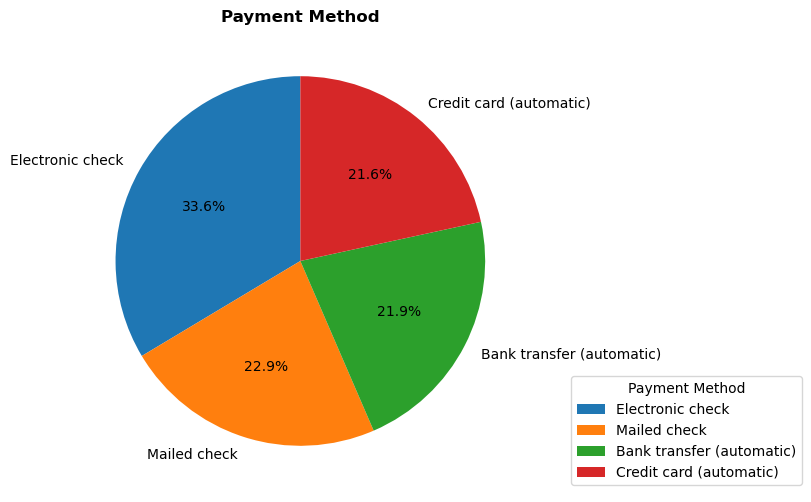

In [28]:
payment_method = df['PaymentMethod'].value_counts()

# Mengatur label dan nilai untuk pie chart
labels = payment_method.index
sizes = payment_method.values

# Mengatur tampilan grafik
plt.figure(figsize=(6, 6))

# Membuat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.legend(title='Payment Method', loc='lower right',bbox_to_anchor=(1.6,0))

# Mengatur judul
plt.title('Payment Method', fontsize=12, fontweight='bold')

# Menampilkan pie chart
plt.show()

Customer Cenderung Membayar menggunakan E-Check

### Data Preprosessing

Kita tidak memerlukan Customer ID untuk melakukan permodelan

In [29]:
df.drop("customerID",axis=1,inplace=True)

Sebelum melakukan permodelan kita perlu memastikan semua data dalam bentuk angka menggunakan label encoding

In [30]:
LE = preprocessing.LabelEncoder()
preprocessed_df = df.copy()
for col in categorical_features:
    preprocessed_df[col]=preprocessed_df[[col]].apply(LE.fit_transform)

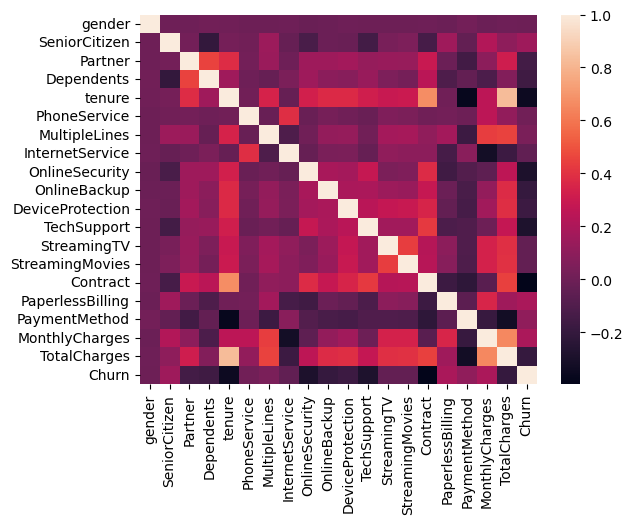

In [31]:
sns.heatmap(preprocessed_df.corr());

### Pembagian Data

In [32]:
X = preprocessed_df[['tenure', 'MonthlyCharges', 'TotalCharges','gender', 
                     'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                     'Contract', 'PaperlessBilling', 'PaymentMethod']]
y = df[['Churn']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # Membagi data latih 80% data Uji 20%

print("Banyak data Latih Train-Validation Split:", len(X_train))
print("Banyak data Uji Train-Validation Split:", len(X_test))

Banyak data Latih Train-Validation Split: 5630
Banyak data Uji Train-Validation Split: 1408


### Decission Tree

In [43]:
dt = DecisionTreeClassifier(
   max_depth = None,
   min_samples_split = 2
)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_scores = cross_val_score(dt, X, y, cv=kfold)

for i, x in enumerate(dt_scores):
    print(f"Fold-{i+1}: {dt_scores}")

print("Rata-rata Akurasi: ", dt_scores.mean())

Fold-1: [0.73721591 0.74431818 0.73011364 0.7228145  0.7206823 ]
Fold-2: [0.73721591 0.74431818 0.73011364 0.7228145  0.7206823 ]
Fold-3: [0.73721591 0.74431818 0.73011364 0.7228145  0.7206823 ]
Fold-4: [0.73721591 0.74431818 0.73011364 0.7228145  0.7206823 ]
Fold-5: [0.73721591 0.74431818 0.73011364 0.7228145  0.7206823 ]
Rata-rata Akurasi:  0.7310289057956968


### Hyperparamater Decision Tree

In [35]:
hdt = DecisionTreeClassifier(
   max_depth = 1,
   min_samples_split = 2
)
hdt.fit(X_train, y_train)
y_pred = hdt.predict(X_test)
hdt_scores = cross_val_score(hdt, X, y, cv=kfold)
for i, x in enumerate(hdt_scores):
    print(f"Fold-{i+1}: {hdt_scores}")

print("Rata-rata Akurasi: ", hdt_scores.mean())

Fold-1: [0.7265625  0.72372159 0.73082386 0.7384506  0.75266525]
Fold-2: [0.7265625  0.72372159 0.73082386 0.7384506  0.75266525]
Fold-3: [0.7265625  0.72372159 0.73082386 0.7384506  0.75266525]
Fold-4: [0.7265625  0.72372159 0.73082386 0.7384506  0.75266525]
Fold-5: [0.7265625  0.72372159 0.73082386 0.7384506  0.75266525]
Rata-rata Akurasi:  0.7344447607740519


### K-Nearest Neighbors

In [36]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_scores = cross_val_score(knn, X, y, cv=kfold)
for i, x in enumerate(knn_scores):
    print(f"Fold-{i+1}: {knn_scores}")

print("Rata-rata Akurasi: ", knn_scores.mean())

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Fold-1: [0.76775568 0.76349432 0.75994318 0.7604833  0.77043355]
Fold-2: [0.76775568 0.76349432 0.75994318 0.7604833  0.77043355]
Fold-3: [0.76775568 0.76349432 0.75994318 0.7604833  0.77043355]
Fold-4: [0.76775568 0.76349432 0.75994318 0.7604833  0.77043355]
Fold-5: [0.76775568 0.76349432 0.75994318 0.7604833  0.77043355]
Rata-rata Akurasi:  0.7644220052335724


### Logistic Regression

In [37]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_scores = cross_val_score(lr, X, y, cv=kfold)
for i, x in enumerate(lr_scores):
    print(f"Fold-{i+1}: {lr_scores}")

print("Rata-rata Akurasi: ", lr_scores.mean())

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Fold-1: [0.80965909 0.80326705 0.81036932 0.78251599 0.81094527]
Fold-2: [0.80965909 0.80326705 0.81036932 0.78251599 0.81094527]
Fold-3: [0.80965909 0.80326705 0.81036932 0.78251599 0.81094527]
Fold-4: [0.80965909 0.80326705 0.81036932 0.78251599 0.81094527]
Fold-5: [0.80965909 0.80326705 0.81036932 0.78251599 0.81094527]
Rata-rata Akurasi:  0.8033513439297021


Berdasarkan running model di atas, dapat kita lihat bahwa model yang paling cocok untuk digunakan dalam memprediksi customer churning adalah menggunakan Logistic Regression, dalam hal ini berarti akurasi prediksi menggunakan Logistic Regression adalah sebesar 80.34% yang menunjukkan bahwa penggunaan Logistic Regression sudah reliabel untuk digunakan

## Kesimpulan

Hasil permodelan dapat diimplementasikan untuk dapat melihat perilaku customer saat ingin berlangganan dengan melihat paket paket yang ia pilih bersamaan dengan pemasangan internet service, hal ini dapat dilakukan untuk mencegah terjadinya customer churning. Terdapat distribusi yang seimbang antara pria dan wanita yang churning hal ini menunjukkan bahwa jenis kelamin tidak secara signifikan mempengaruhi churning. Ada beberapa hal yang dapat menyebabkan customer churning :
1. Pembayaran bulanan yang lumayan tinggi untuk pelanggan dengan paket kontrak perbulan
2. Pembayaran yang dirasa tinggi oleh pelanggan yang tinggal sendiri
3. Internet Service jenis Fiber Optic yang sepertinya bermasalah sehingga kebanyakan pelanggan Fiber Optic memilih churning
4. Adanya PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtections, TechSupports, StreamingTV, StreamingMovies, dan contracts setahun/lebih juga mempengaruhi churning, Pelanggan yang memasang fitur-fitur ini cenderung lebih setia terhadap perusahaan. 

Hal ini memberikan wawasan tentang segmentasi pasar dan membantu mengidentifikasi kelompok pelanggan yang cenderung menunjukkan loyalitas dan tingkat churn yang lebih rendah.

## Saran

1. Memperhatikan paket-paket yang dipilih oleh pelanggan saat berlangganan. Analisis menunjukkan bahwa paket-paket tertentu memiliki pengaruh terhadap churning.

2. Memberikan perhatian khusus pada fitur-fitur seperti PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtections, TechSupports, StreamingTV, StreamingMovies, dan kontrak setahun/lebih. Pelanggan yang menggunakan fitur-fitur ini cenderung lebih setia terhadap perusahaan.

3. Melakukan segmentasi pasar berdasarkan perilaku pelanggan. Dengan memahami segmentasi pasar, perusahaan dapat mengidentifikasi kelompok pelanggan yang cenderung menunjukkan loyalitas dan memiliki tingkat churning yang lebih rendah.

4. Terus memantau perilaku pelanggan dan melakukan evaluasi secara berkala. Perubahan tren pasar dan preferensi pelanggan dapat mempengaruhi tingkat churning. 

5. Menggabungkan hasil analisis ini dengan strategi pemasaran dan manajemen pelanggan secara menyeluruh.